In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name='Full_new')
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### remove the unnecessary columns

In [4]:
df.drop('Sl. No', axis=1, inplace=True)

In [5]:
df.columns

Index(['Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

### decode the columns with Yes/No 

In [6]:
def decoder(col=str()):
    df.loc[:,col]=list(map(lambda x:'No' if x==0 else 'Yes', df.loc[:,col]))
    return 0

In [7]:
col_list=['PCOS (Y/N)','Pregnant(Y/N)','Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
for i in col_list:
    print(i)
    decoder(i)

PCOS (Y/N)
Pregnant(Y/N)
Weight gain(Y/N)
hair growth(Y/N)
Skin darkening (Y/N)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg.Exercise(Y/N)


In [8]:
df.loc[:,col_list].head(10)

,PCOS (Y/N),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,No,No,No,No,No,No,No,Yes,No
1,No,Yes,No,No,No,No,No,No,No
2,Yes,Yes,No,No,No,Yes,Yes,Yes,No
3,No,No,No,No,No,No,No,No,No
4,No,Yes,No,No,No,Yes,No,No,No
5,No,Yes,Yes,No,No,Yes,No,No,No
6,No,No,No,No,No,No,No,No,No
7,No,Yes,Yes,No,No,No,No,No,No
8,No,No,No,No,No,No,No,No,No
9,No,No,No,No,No,No,No,No,No


### check the wronlgy identified datatype

In [9]:
pd.set_option('display.max_columns', None)
df[df['II    beta-HCG(mIU/mL)']=='1.99.']

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
123,124,Yes,23,40.0,150.0,17.8,15,74,18,10.8,2,5,2.0,No,0,1.99,1.99.,5.0,5.15,0.97,46,38,0.826,1.69,19.8,15.23,23.5,0.93,92.0,Yes,Yes,Yes,Yes,No,Yes,Yes,100,70,10,13,18.0,17.0,12.5


In [10]:
df['II    beta-HCG(mIU/mL)'].replace({'1.99.':'1.99'}, inplace=True)

In [11]:
(df.iloc[123]['II    beta-HCG(mIU/mL)'])

'1.99'

In [12]:
df['II    beta-HCG(mIU/mL)']=df['II    beta-HCG(mIU/mL)'].astype('float64')

In [13]:
df['II    beta-HCG(mIU/mL)'].dtype

dtype('float64')

In [14]:
df[df['AMH(ng/mL)']=='a']

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
305,306,No,37,56.0,152.0,24.2,13,74,20,11.7,2,5,9.0,No,0,42.0,1.99,2.91,0.35,8.31,35,33,0.943,16.0,a,2.22,38.6,0.3,100.0,No,No,No,No,Yes,No,Yes,120,70,4,5,17.0,16.0,5.6


In [15]:
df['AMH(ng/mL)'].replace({'a':0}, inplace=True)

In [16]:
df['AMH(ng/mL)']=df['AMH(ng/mL)'].astype('float64')

### remove spaces from column names for ease of use

In [17]:
def space(col=str()):
    new_col=col.replace(' ','')
    df.rename(columns={col:new_col}, inplace=True)
    return 0    

In [18]:
col_name=['PCOS (Y/N)',' Age (yrs)','Weight (Kg)','RR (breaths/min)','BP _Systolic (mmHg)','BP _Diastolic (mmHg)',
          'Follicle No. (L)','Follicle No. (R)','Avg. F size (L) (mm)','Avg. F size (R) (mm)','Endometrium (mm)']
for i in col_name:
    space(i)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1   PCOS(Y/N)               541 non-null    object 
 2   Age(yrs)                541 non-null    int64  
 3   Weight(Kg)              541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    int64  
 7   Pulse rate(bpm)         541 non-null    int64  
 8   RR(breaths/min)         541 non-null    int64  
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    int64  
 11  Cycle length(days)      541 non-null    int64  
 12  Marraige Status (Yrs)   540 non-null    float64
 13  Pregnant(Y/N)           541 non-null    object 
 14  No. of aborptions       541 non-null    in

In [20]:
df.rename(columns={'  I   beta-HCG(mIU/mL)':'I_beta-HCG(mIU/mL)',
                  'II    beta-HCG(mIU/mL)':'II_beta-HCG(mIU/mL)'}, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient File No.       541 non-null    int64  
 1   PCOS(Y/N)              541 non-null    object 
 2   Age(yrs)               541 non-null    int64  
 3   Weight(Kg)             541 non-null    float64
 4   Height(Cm)             541 non-null    float64
 5   BMI                    541 non-null    float64
 6   Blood Group            541 non-null    int64  
 7   Pulse rate(bpm)        541 non-null    int64  
 8   RR(breaths/min)        541 non-null    int64  
 9   Hb(g/dl)               541 non-null    float64
 10  Cycle(R/I)             541 non-null    int64  
 11  Cycle length(days)     541 non-null    int64  
 12  Marraige Status (Yrs)  540 non-null    float64
 13  Pregnant(Y/N)          541 non-null    object 
 14  No. of aborptions      541 non-null    int64  
 15  I_beta

### decode blood group to their proper names 

In [22]:
df['Blood Group'].replace({11:'A+',12:'A-',13:'B+',14:'B-',15:'O+',16:'O-',17:'AB+',18:'AB-'}, inplace=True)

In [23]:
df['Blood Group']

0       O+
1       O+
2       A+
3       B+
4       A+
      ... 
536    AB+
537     O+
538     B+
539     O+
540     B+
Name: Blood Group, Length: 541, dtype: object

### Exploratory Data Analysis

### check for the zero (0) values in the columns

In [24]:
pd.Series(index=df.columns[df.dtypes!='object'], 
          data=list(map(lambda x: (df[x]==0).sum(), df.columns[df.dtypes!='object'])))

Patient File No.           0
Age(yrs)                   0
Weight(Kg)                 0
Height(Cm)                 0
BMI                        0
Pulse rate(bpm)            0
RR(breaths/min)            0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         1
Marraige Status (Yrs)      1
No. of aborptions        437
I_beta-HCG(mIU/mL)         0
II_beta-HCG(mIU/mL)        0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     1
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 1
PRL(ng/mL)                 0
Vit D3 (ng/mL)             1
PRG(ng/mL)                 0
RBS(mg/dl)                 0
BP_Systolic(mmHg)          0
BP_Diastolic(mmHg)         0
FollicleNo.(L)            10
FollicleNo.(R)            11
Avg.Fsize(L)(mm)           7
Avg.Fsize(R)(mm)           1
Endometrium(mm)            2
dtype: int64

### some variables have 0 values which shows no data. Replace those values with NAN first then plot the distubution 
### and see which impuation to use(mean/median/mode)

In [25]:
zero_col=['Endometrium(mm)','Avg.Fsize(R)(mm)','Avg.Fsize(L)(mm)', 'FollicleNo.(R)','FollicleNo.(L)','Vit D3 (ng/mL)',
         'Cycle length(days)', 'FSH/LH']

In [26]:
def replace_zero(col):
    df[col].replace({0:np.nan}, inplace=True)
    return 0

In [27]:
for i in zero_col:
    replace_zero(i)

In [28]:
for col in zero_col:
    if df[col].skew()!=0: # if the data is skewed fill na with median 
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True) # if data is normal then use mean

In [29]:
pd.Series(index=df.columns[df.dtypes!='object'], 
          data=list(map(lambda x: (df[x]==0).sum(), df.columns[df.dtypes!='object'])))
#check once again the zero values in the data 

Patient File No.           0
Age(yrs)                   0
Weight(Kg)                 0
Height(Cm)                 0
BMI                        0
Pulse rate(bpm)            0
RR(breaths/min)            0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
No. of aborptions        437
I_beta-HCG(mIU/mL)         0
II_beta-HCG(mIU/mL)        0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 1
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
BP_Systolic(mmHg)          0
BP_Diastolic(mmHg)         0
FollicleNo.(L)             0
FollicleNo.(R)             0
Avg.Fsize(L)(mm)           0
Avg.Fsize(R)(mm)           0
Endometrium(mm)            0
dtype: int64

## Outliers

In [30]:
numerical_col=df.columns[df.dtypes!='object']
numerical_col

Index(['Patient File No.', 'Age(yrs)', 'Weight(Kg)', 'Height(Cm) ', 'BMI',
       'Pulse rate(bpm) ', 'RR(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
       'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
       'FollicleNo.(L)', 'FollicleNo.(R)', 'Avg.Fsize(L)(mm)',
       'Avg.Fsize(R)(mm)', 'Endometrium(mm)'],
      dtype='object')

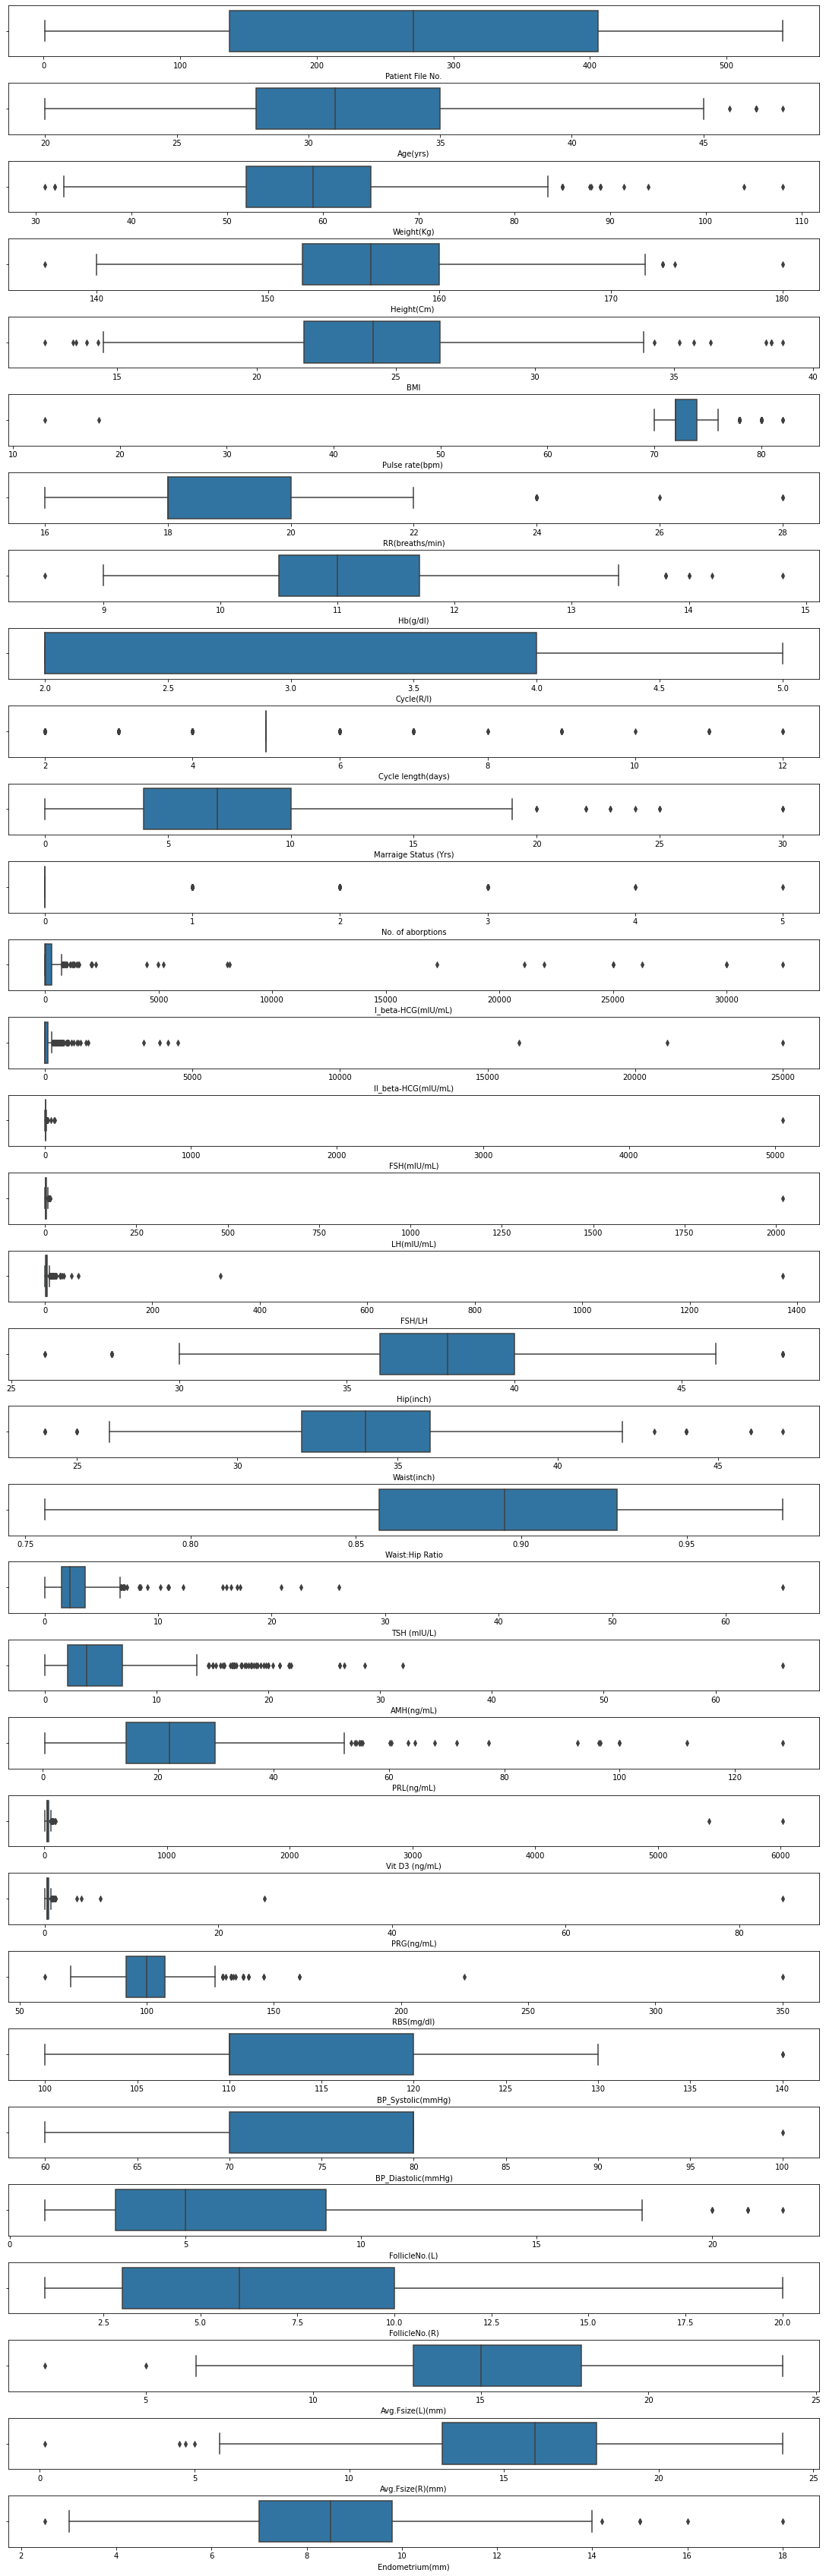

In [31]:
fig,ax=plt.subplots(numerical_col.size ,figsize=(15,47))
i=0

for col in numerical_col:
    sns.boxplot(x=df[col], ax=ax[i])
    #ax[i].plot(df[col], kind='bar')
    plt.xlabel(col)
    i=i+1
    #plt.title(col)
    #plt.setp(ax[i], xlabel='x axis label')
    #plt.setp(ax[i], ylabel='y axis label')
    #ax[i].set_title(col)
    #ax[i].set(xlabel= 'x axis lsab')

fig.tight_layout(pad=0.3)
#plt.setp(ax[-1, :], xlabel='x axis label')
#plt.setp(ax[:, 0], ylabel='y axis label')


In [32]:
outliers=['Pulse rate(bpm) ','I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)']

In [33]:
for i in outliers:
    print(i,df[i].skew())

Pulse rate(bpm)  -7.94849730727317
I_beta-HCG(mIU/mL) 7.5233362601661655
II_beta-HCG(mIU/mL) 12.808928349459077
FSH(mIU/mL) 23.24452964955369
LH(mIU/mL) 23.234663864684624
FSH/LH 21.46386390715393
TSH (mIU/L) 9.790705619469657
PRL(ng/mL) 2.4414120295152983
Vit D3 (ng/mL) 16.43687610621027
PRG(ng/mL) 20.730653678811407
RBS(mg/dl) 5.488676302381497


In [34]:
from scipy import stats

In [35]:
df['PulseRateZS']=stats.zscore(df['Pulse rate(bpm) '])

In [36]:
df[df['PulseRateZS']<-3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS
223,224,No,30,62.0,169.0,21.7,A+,18,20,12.0,2,5.0,5.0,No,0,1.99,1.99,7.040,4.09,1.72,38,34,0.895,1.540,7.8,19.60,31.8,0.25,95.0,No,No,No,Yes,No,Yes,Yes,120,70,4.0,3.0,14.0,18.0,8.7,-12.482001
296,297,No,31,50.0,155.0,20.8,O+,13,18,11.0,2,4.0,12.0,No,0,20.81,1.99,6.698,5.13,1.31,33,30,0.909,3.861,10.8,14.02,24.9,0.41,100.0,No,No,Yes,No,Yes,No,No,110,70,8.0,5.0,17.0,15.0,8.5,-13.611641


In [37]:
df.drop(index=[223,296], inplace=True)

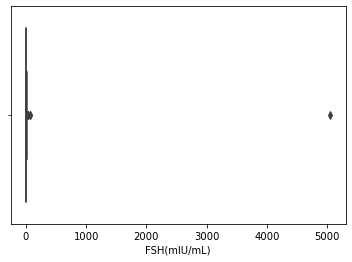

In [38]:
sns.boxplot(df['FSH(mIU/mL)'])

In [39]:
df['FSH_ZS']=stats.zscore(df['FSH(mIU/mL)'])

In [40]:
df[df['FSH_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS
329,330,No,29,53.0,161.0,20.4,O+,72,18,10.2,2,6.0,5.0,Yes,0,900.6,900.6,5052.0,3.68,1372.83,38,35,0.921,0.83,3.5,30.58,28.6,0.3,108.0,No,No,No,Yes,Yes,Yes,No,110,80,6.0,4.0,16.0,17.0,6.0,-0.281888,23.189875


In [41]:
df.drop(index=df[df['FSH_ZS']>3.0].index, inplace=True)

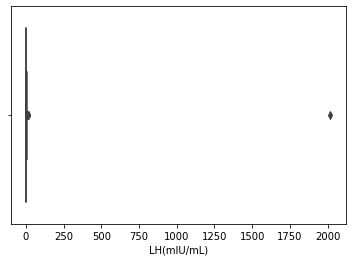

In [42]:
sns.boxplot(df['LH(mIU/mL)'])

In [43]:
df['LH_ZS']=stats.zscore(df['LH(mIU/mL)'])

In [44]:
df[df['LH_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS
455,456,Yes,32,52.0,150.0,23.1,B+,70,18,9.4,2,5.0,12.0,No,0,272.78,1.99,4.33,2018.0,2.17,36,32,0.889,2.1,7.7,40.47,41.04,0.25,93.0,No,No,No,No,Yes,No,Yes,110,80,6.0,7.0,18.0,18.0,9.0,-0.733744,-0.047419,23.165085


In [45]:
df.drop(index=df[df['LH_ZS']>3.0].index, inplace=True)

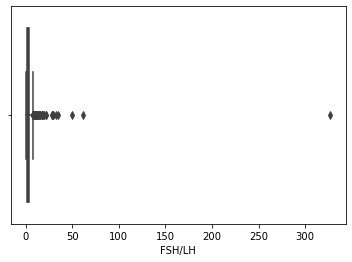

In [46]:
sns.boxplot(df['FSH/LH'])

In [47]:
df['FSH/LH_ZS']=stats.zscore(df['FSH/LH'])

In [48]:
df[df['FSH/LH_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS
87,88,No,40,56.0,156.0,23.0,A+,80,20,10.3,2,5.0,8.0,Yes,0,162.05,1.99,1.00,0.020,50.00,38,34,0.895,1.52,2.26,28.08,55.9,0.750,125.0,No,No,No,No,No,No,No,120,70,11.0,9.0,17.0,18.0,4.6,1.525536,-0.062749,-0.074418,3.052640
180,181,Yes,30,70.0,150.0,31.1,O-,74,18,11.7,4,4.0,8.0,No,0,1.99,1.99,1.98,0.032,61.88,38,32,0.842,1.98,32.00,14.13,74.5,0.047,100.0,Yes,Yes,No,Yes,No,Yes,No,120,80,8.0,6.0,12.0,11.0,4.5,0.169968,-0.058238,-0.074280,3.847832
250,251,Yes,45,85.0,153.0,36.3,O+,72,18,12.0,4,4.0,18.0,No,0,50.43,1.99,65.40,0.200,327.00,44,40,0.909,2.96,11.10,21.70,18.7,0.250,86.0,Yes,Yes,Yes,Yes,Yes,Yes,No,120,80,10.0,15.0,15.0,17.0,8.3,-0.281888,0.233721,-0.072345,21.593742


In [49]:
df.drop(index=df[df['FSH/LH_ZS']>3.0].index, inplace=True)

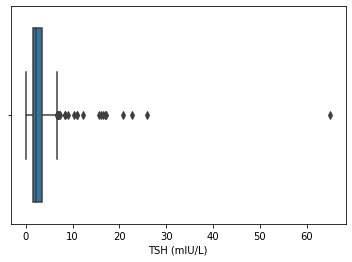

In [50]:
sns.boxplot(df['TSH (mIU/L)'])

In [51]:
df['TSH_ZS']=stats.zscore(df['TSH (mIU/L)'])

In [52]:
df[df['TSH_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS
3,4,No,37,65.0,148.000,29.7,B+,72,20,12.0,2,5.0,4.0,No,0,1.99,1.99,8.06,2.36,3.42,42,36,0.857,16.41,1.22,36.90,33.40,0.36,76.0,No,No,No,No,No,No,No,120,70,2.0,2.0,15.0,14.0,7.5,-0.281888,-0.030248,-0.047470,-0.065210,3.555459
37,38,No,26,72.0,157.000,29.2,A+,70,18,11.0,2,5.0,1.0,No,0,12.00,1.99,6.04,2.32,2.60,42,34,0.810,65.00,0.88,30.59,20.25,0.88,90.0,No,No,No,No,No,No,No,120,80,1.0,2.0,6.5,8.5,10.0,-0.733744,-0.039547,-0.047931,-0.120097,16.431321
128,129,No,41,54.0,150.000,24.0,O+,70,18,11.5,2,5.0,10.0,No,0,98.91,54.08,7.37,1.51,4.88,38,30,0.789,15.68,2.40,20.16,25.60,0.28,92.0,No,No,No,No,No,No,Yes,110,80,5.0,1.0,15.0,9.0,14.0,-0.733744,-0.033424,-0.057259,0.032515,3.362017
168,169,Yes,30,72.3,158.000,29.0,O+,74,20,10.8,4,4.0,8.0,No,0,1.99,1.99,1.00,0.98,1.02,40,34,0.850,16.99,2.83,15.77,22.80,0.25,95.0,Yes,Yes,Yes,Yes,Yes,Yes,No,120,80,9.0,12.0,14.0,16.0,9.0,0.169968,-0.062749,-0.063362,-0.225855,3.709154
233,234,No,31,50.0,152.000,21.6,O+,72,18,10.0,2,6.0,4.5,No,1,392.73,1.99,5.37,8.15,0.66,34,30,0.882,25.91,16.80,14.41,23.91,0.25,92.0,No,No,No,No,Yes,Yes,Yes,120,80,7.0,5.0,17.0,15.0,9.0,-0.281888,-0.042631,0.019209,-0.249952,6.072864
278,279,Yes,45,50.0,154.000,21.1,AB+,72,18,10.2,4,4.0,11.0,No,2,412.90,366.04,2.24,1.99,1.13,30,27,0.900,22.59,6.50,16.84,10.50,0.50,138.0,Yes,Yes,Yes,Yes,Yes,Yes,No,120,80,4.0,8.0,15.0,18.0,7.2,-0.281888,-0.057041,-0.051731,-0.218492,5.193097
305,306,No,37,56.0,152.000,24.2,B+,74,20,11.7,2,5.0,9.0,No,0,42.00,1.99,2.91,0.35,8.31,35,33,0.943,16.00,0.00,2.22,38.60,0.30,100.0,No,No,No,No,Yes,No,Yes,120,70,4.0,5.0,17.0,16.0,5.6,0.169968,-0.053956,-0.070618,0.262104,3.446814
346,347,Yes,28,83.0,164.000,30.9,A+,74,20,11.1,4,2.0,7.0,No,1,1.99,1.99,5.50,3.03,1.82,42,37,0.881,20.85,20.40,14.63,10.50,0.52,110.0,Yes,Yes,No,Yes,Yes,Yes,No,110,80,10.0,12.0,15.0,17.0,10.0,0.169968,-0.042033,-0.039754,-0.172307,4.732015
535,536,No,26,80.0,161.544,30.7,AB-,70,18,10.6,2,5.0,4.0,No,0,1.99,1.99,7.06,3.50,2.02,48,44,0.917,17.20,7.60,39.01,32.70,0.25,92.0,No,No,No,No,No,No,No,110,80,7.0,9.0,13.0,17.5,9.6,-0.733744,-0.034851,-0.034342,-0.158920,3.764801


In [53]:
df.drop(index=df[df['TSH_ZS']>3.0].index, inplace=True)

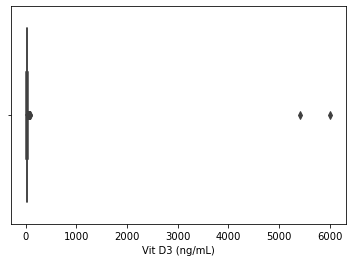

In [54]:
sns.boxplot(df['Vit D3 (ng/mL)'])

In [55]:
df['VitD3_ZS']=stats.zscore(df['Vit D3 (ng/mL)'])

In [56]:
df[df['VitD3_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS
191,192,Yes,29,63.0,153.0,26.9,AB+,74,18,11.0,4,3.0,8.0,No,0,3.99,3.99,3.63,1.02,3.56,39,35,0.897,2.66,6.41,29.08,6014.66,0.25,123.0,Yes,Yes,Yes,Yes,Yes,Yes,No,120,70,14.0,16.0,16.0,17.0,9.0,0.169968,-0.050642,-0.062902,-0.055839,-0.088152,16.987651
195,196,Yes,35,60.0,153.4,25.5,B+,72,20,13.2,4,4.0,14.0,No,1,1.99,1.99,22.00,3.39,6.49,38,35,0.921,2.42,6.65,16.34,5418.60,0.31,100.0,Yes,No,Yes,Yes,Yes,Yes,No,120,80,8.0,10.0,15.0,13.0,5.5,-0.281888,0.033926,-0.035608,0.140281,-0.151750,15.289887


In [57]:
df.drop(index=df[df['VitD3_ZS']>3.0].index, inplace=True)

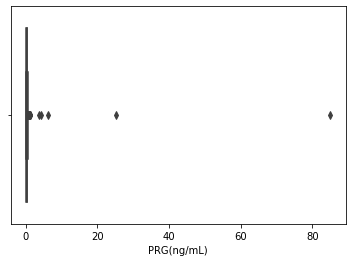

In [58]:
sns.boxplot(df['PRG(ng/mL)'])

In [59]:
df['PRG_ZS']=stats.zscore(df['PRG(ng/mL)'])

In [60]:
df[df['PRG_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS,PRG_ZS
41,42,No,29,78.0,165.0,28.7,B+,72,16,12.8,2,5.0,2.0,Yes,0,497.41,497.41,5.60,2.13,2.63,42,36,0.857,0.93,3.88,20.46,14.36,85.0,92.0,No,No,No,No,No,No,No,110,80,8.0,10.0,11.0,12.0,6.50,-0.281888,-0.041573,-0.050119,-0.118089,-0.546585,-0.103069,21.804835
484,485,No,31,63.0,156.0,25.9,A+,72,20,10.8,2,5.0,5.0,No,0,1.99,1.99,5.28,3.46,1.53,39,36,0.923,2.48,6.26,28.08,16.25,25.3,116.0,No,Yes,No,Yes,No,Yes,Yes,120,80,9.0,10.0,18.0,17.0,7.25,-0.281888,-0.043046,-0.034802,-0.191718,-0.135851,-0.097686,6.377668


In [61]:
df.drop(index=df[df['PRG_ZS']>3.0].index, inplace=True)

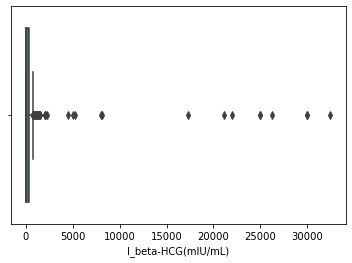

In [62]:
sns.boxplot(df['I_beta-HCG(mIU/mL)'])

In [63]:
df['I_beta_ZS']=stats.zscore(df['I_beta-HCG(mIU/mL)'])

In [64]:
df[df['I_beta_ZS']>3.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS,PRG_ZS,I_beta_ZS
110,111,No,21,59.0,150.0,26.2,O+,72,18,11.2,4,6.0,2.0,Yes,0,26290.26,3350.19,4.13,5.11,0.81,41,34,0.829,1.26,21.90,13.97,33.4,1.00,125.0,No,No,Yes,Yes,No,No,Yes,100,70,1.0,1.0,11.0,10.0,8.5,-0.281888,-0.048340,-0.015800,-0.239912,-0.459138,-0.048838,0.098269,7.514412
111,112,No,26,75.0,170.0,26.0,O+,72,18,11.2,4,2.0,3.0,Yes,0,32460.97,97.63,6.21,2.18,2.85,40,34,0.850,2.44,1.60,21.48,25.3,0.28,100.0,No,Yes,Yes,Yes,No,Yes,Yes,120,80,5.0,4.0,17.0,19.0,10.0,-0.281888,-0.038764,-0.049543,-0.103363,-0.146450,-0.071909,-0.087788,9.325305
138,139,No,27,59.0,160.0,23.0,O+,70,18,10.8,2,5.0,5.0,Yes,0,21977.29,16069.69,3.14,0.09,34.89,40,34,0.850,0.04,4.60,19.99,47.0,0.53,84.0,No,No,No,Yes,Yes,No,No,110,70,8.0,5.0,18.0,15.0,9.0,-0.733744,-0.052897,-0.073612,2.041246,-0.782426,-0.010101,-0.023185,6.248702
214,215,No,29,63.0,152.0,27.3,A+,72,18,13.2,2,6.0,11.0,Yes,4,25000.00,475.04,1.99,1.61,1.24,38,34,0.895,1.77,5.96,21.95,22.7,0.46,95.0,Yes,No,No,Yes,Yes,Yes,No,110,80,6.0,7.0,16.0,14.0,5.0,-0.281888,-0.058192,-0.056107,-0.211129,-0.323993,-0.079315,-0.041274,7.135764
252,253,Yes,47,62.7,154.0,26.4,O+,72,18,10.0,4,4.0,30.0,Yes,2,25000.00,25000.00,1.88,0.25,7.52,38,36,0.947,2.47,6.20,31.47,12.1,0.25,92.0,Yes,Yes,Yes,Yes,No,No,No,110,80,14.0,11.0,16.0,19.0,9.3,-0.281888,-0.058698,-0.071769,0.209225,-0.138500,-0.109507,-0.095540,7.135764
315,316,No,28,65.0,167.0,23.3,A+,72,18,9.0,2,6.0,5.0,Yes,0,21084.21,21084.21,3.76,0.62,6.06,38,34,0.895,1.82,3.02,28.56,52.4,0.25,120.0,No,No,No,No,No,Yes,No,110,80,8.0,12.0,14.0,18.0,8.5,-0.281888,-0.050043,-0.067508,0.111499,-0.310744,0.005280,-0.095540,5.986613
317,318,No,28,53.0,159.0,21.0,A+,74,18,10.8,2,6.0,4.0,Yes,0,17243.97,410.13,4.89,0.58,8.43,36,30,0.833,1.14,2.06,21.19,22.2,0.27,80.0,No,No,No,Yes,Yes,Yes,No,100,70,4.0,6.0,14.0,18.0,7.7,0.169968,-0.044841,-0.067969,0.270136,-0.490937,-0.080739,-0.090372,4.859633
446,447,No,29,63.0,162.0,24.0,A+,72,18,13.2,2,5.0,11.0,No,0,30004.00,475.04,1.99,1.61,1.24,39,37,0.949,1.77,5.96,21.95,22.7,0.46,95.0,No,Yes,Yes,No,No,Yes,No,110,80,6.0,7.0,18.0,19.0,5.9,-0.281888,-0.058192,-0.056107,-0.211129,-0.323993,-0.079315,-0.041274,8.604268
447,448,Yes,47,62.7,160.0,24.5,O+,72,18,10.0,4,7.0,30.0,No,0,30007.00,1.99,1.88,0.25,7.52,39,36,0.923,2.47,6.20,31.47,12.1,0.25,92.0,No,No,No,No,Yes,Yes,Yes,110,80,14.0,11.0,20.0,19.0,6.0,-0.281888,-0.058698,-0.071769,0.209225,-0.138500,-0.109507,-0.095540,8.605149


In [65]:
df.drop(index=df[df['I_beta_ZS']>3.0].index, inplace=True)

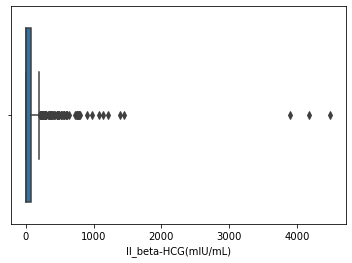

In [66]:
sns.boxplot(df['II_beta-HCG(mIU/mL)'])

In [67]:
df['II_beta_ZS']=stats.zscore(df['II_beta-HCG(mIU/mL)'])

In [68]:
df[df['II_beta_ZS']>4.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS,PRG_ZS,I_beta_ZS,II_beta_ZS
25,26,No,41,42.0,152.0,18.2,A-,80,20,11.5,2,5.0,15.0,Yes,0,4490.18,4490.18,8.82,4.39,2.01,39,32,0.821,0.84,0.26,17.35,45.6,0.98,92.0,No,No,No,No,No,No,No,110,70,1.0,2.0,15.0,17.0,8.8,1.525536,-0.026749,-0.024092,-0.159589,-0.570434,-0.014088,0.093100,1.116830,11.673226
108,109,Yes,24,53.0,149.0,23.9,O+,72,22,13.2,4,9.0,3.0,Yes,0,397.08,3893.06,4.62,6.03,0.77,45,39,0.867,1.46,16.90,9.82,15.3,0.98,120.0,Yes,Yes,Yes,No,No,Yes,Yes,110,70,11.0,10.0,15.0,16.0,9.0,-0.281888,-0.046084,-0.005206,-0.242589,-0.406140,-0.100392,0.093100,-0.084356,10.079231
335,336,No,30,46.0,161.0,17.7,O+,78,22,10.8,2,5.0,5.0,Yes,0,8012.99,4176.00,2.44,0.22,11.09,34,31,0.912,0.79,3.30,14.98,13.4,0.89,100.0,No,No,No,Yes,Yes,No,No,110,80,2.0,2.0,14.0,15.0,9.0,1.073680,-0.056120,-0.072115,0.448184,-0.583684,-0.105804,0.069843,2.150655,10.834531


In [69]:
df.drop(index=df[df['II_beta_ZS']>4.0].index, inplace=True)

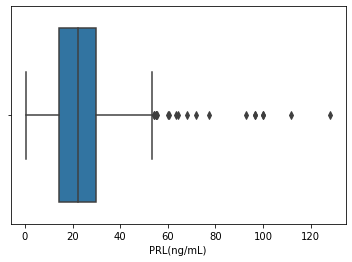

In [70]:
sns.boxplot(df['PRL(ng/mL)'])

In [71]:
df['PRL_ZS']=stats.zscore(df['PRL(ng/mL)'])

In [72]:
df[df['PRL_ZS']>5.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS,PRG_ZS,I_beta_ZS,II_beta_ZS,PRL_ZS
248,249,Yes,33,65.0,153.0,27.8,AB+,72,18,12.0,4,5.0,1.0,No,0,1.99,1.99,5.42,7.85,0.69,38,36,0.947,1.31,1.25,111.74,12.8,0.25,146.0,Yes,Yes,Yes,No,Yes,Yes,No,110,70,7.0,10.0,16.0,19.0,12.0,-0.281888,-0.042401,0.015754,-0.247944,-0.445889,-0.107513,-0.095540,-0.200301,-0.307872,5.720642
274,275,No,30,58.9,153.0,25.2,B+,72,18,12.0,2,5.0,4.0,No,0,1.99,1.99,5.59,3.85,1.45,35,33,0.943,3.00,0.56,128.24,30.3,0.35,88.0,No,No,No,No,No,No,Yes,120,80,4.0,6.0,17.0,17.0,10.3,-0.281888,-0.041619,-0.030311,-0.197073,0.001944,-0.057667,-0.069699,-0.200301,-0.307872,6.802124


In [73]:
df.drop(index=df[df['PRL_ZS']>5.0].index, inplace=True)

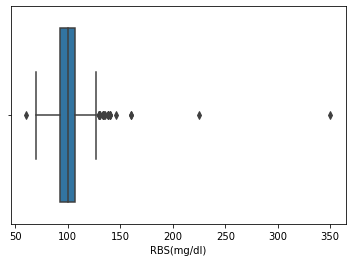

In [74]:
sns.boxplot(df['RBS(mg/dl)'])

In [75]:
df['RBS_ZS']=stats.zscore(df['RBS(mg/dl)'])

In [76]:
df[df['RBS_ZS']>4.0]

,Patient File No.,PCOS(Y/N),Age(yrs),Weight(Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR(breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),FollicleNo.(L),FollicleNo.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),PulseRateZS,FSH_ZS,LH_ZS,FSH/LH_ZS,TSH_ZS,VitD3_ZS,PRG_ZS,I_beta_ZS,II_beta_ZS,PRL_ZS,RBS_ZS
178,179,Yes,37,88.0,168.0,31.2,A-,74,18,11.9,2,5.0,15.0,No,1,3.83,3.83,9.22,3.22,2.86,41,38,0.927,1.68,10.25,3.64,48.96,0.58,350.0,Yes,Yes,Yes,Yes,No,Yes,No,110,80,12.0,14.0,14.0,16.0,11.0,0.169968,-0.024908,-0.037566,-0.102694,-0.347842,-0.004518,-0.010264,-0.199761,-0.302960,-1.364703,13.389262
432,433,No,29,50.0,148.0,22.8,O+,72,22,11.0,2,5.0,5.0,No,0,1.99,1.99,5.64,2.71,2.08,32,28,0.875,1.24,2.80,15.31,32.70,0.25,225.0,No,No,No,Yes,Yes,No,No,120,70,4.0,6.0,10.0,13.0,7.0,-0.281888,-0.041388,-0.043439,-0.154904,-0.464438,-0.050831,-0.095540,-0.200301,-0.307872,-0.599800,6.702059


In [77]:
df.drop(index=df[df['RBS_ZS']>4.0].index, inplace=True)

In [78]:
df.shape

(505, 54)

In [79]:
df.drop(columns=[i for i in df.columns if i.endswith('ZS')], index=1, inplace=True)

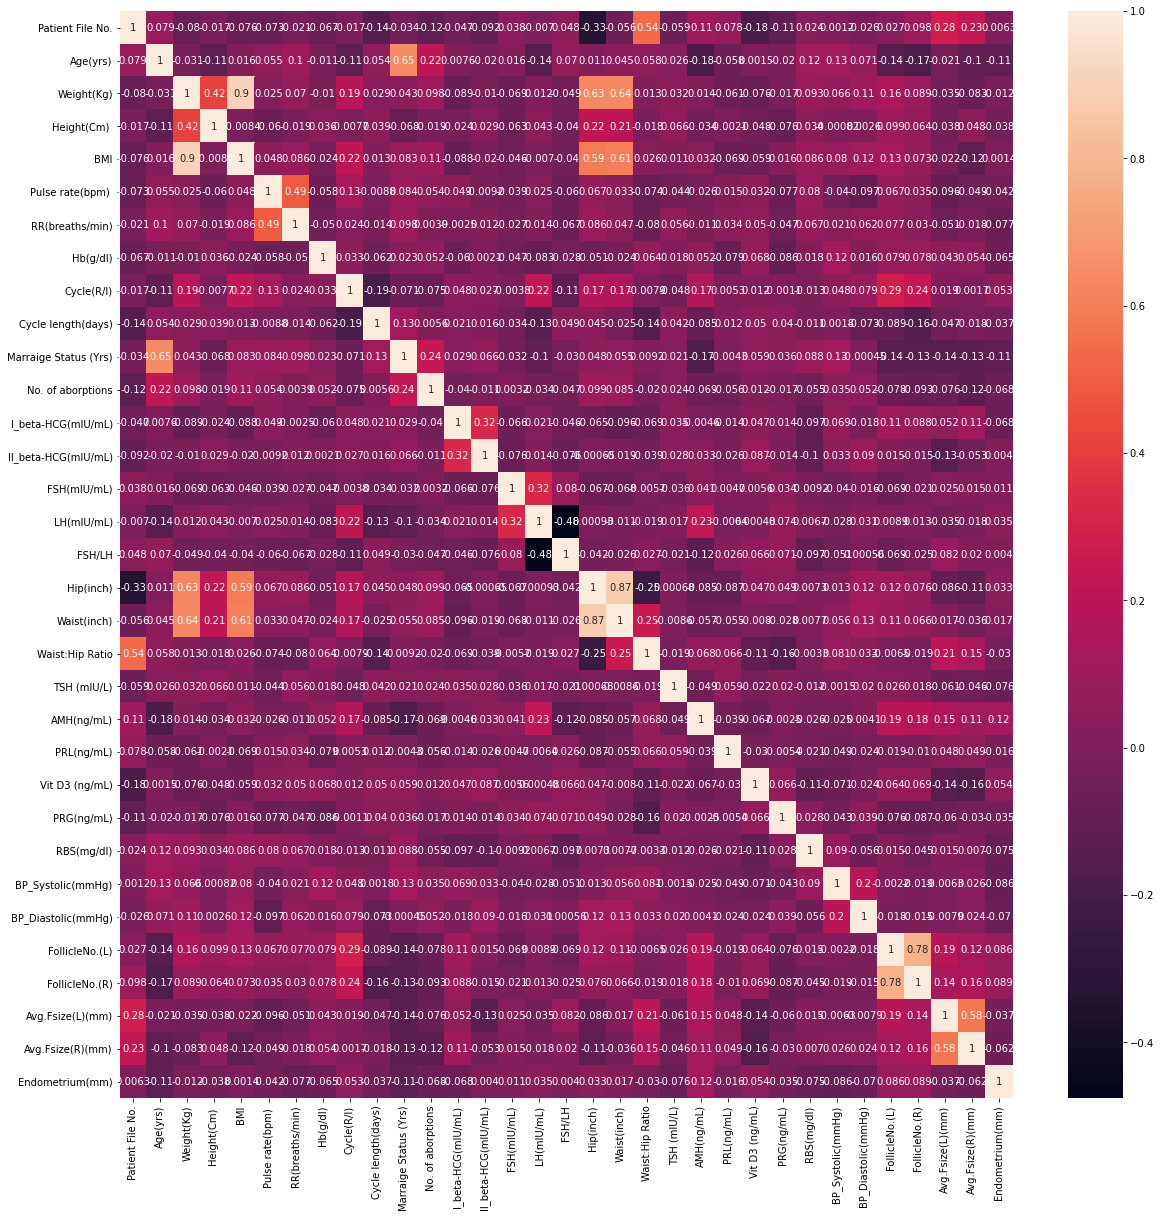

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

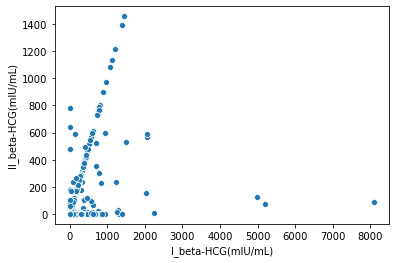

In [81]:
sns.scatterplot(x='I_beta-HCG(mIU/mL)', y='II_beta-HCG(mIU/mL)', data=df) #regression plot sns.re

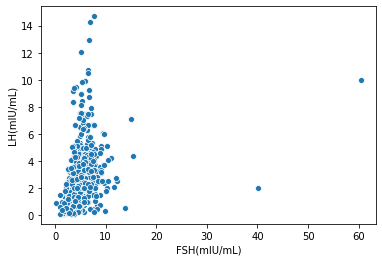

In [82]:
sns.scatterplot(x='FSH(mIU/mL)', y='LH(mIU/mL)', data=df)

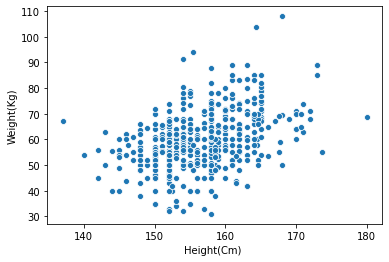

In [83]:
sns.scatterplot(x='Height(Cm) ', y='Weight(Kg)', data=df)

In [84]:
df.columns

Index(['Patient File No.', 'PCOS(Y/N)', 'Age(yrs)', 'Weight(Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP_Systolic(mmHg)',
       'BP_Diastolic(mmHg)', 'FollicleNo.(L)', 'FollicleNo.(R)',
       'Avg.Fsize(L)(mm)', 'Avg.Fsize(R)(mm)', 'Endometrium(mm)'],
      dtype='object')

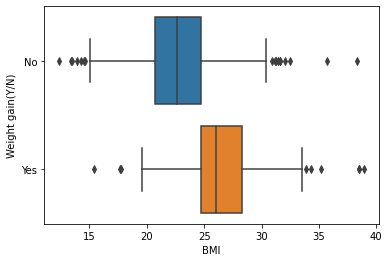

In [85]:
sns.boxplot(x='BMI', y='Weight gain(Y/N)', data=df)

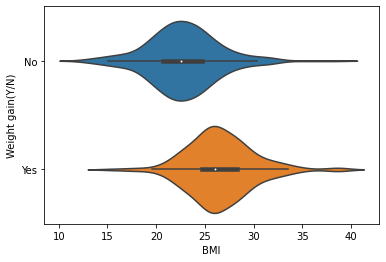

In [86]:
sns.violinplot(x='BMI', y='Weight gain(Y/N)', data=df)

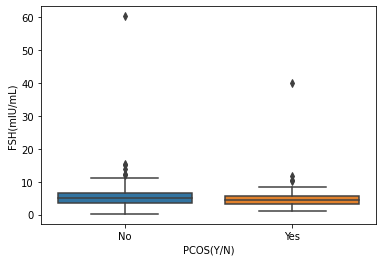

In [87]:
sns.boxplot(x='PCOS(Y/N)', y='FSH(mIU/mL)', data=df)

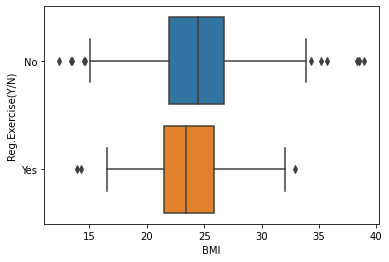

In [88]:
sns.boxplot(x='BMI', y='Reg.Exercise(Y/N)', data=df)

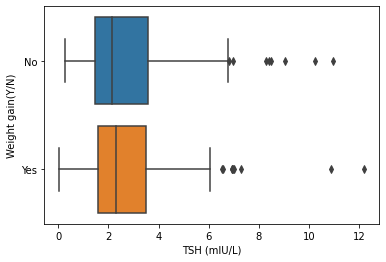

In [89]:
sns.boxplot(x='TSH (mIU/L)', y='Weight gain(Y/N)', data=df)

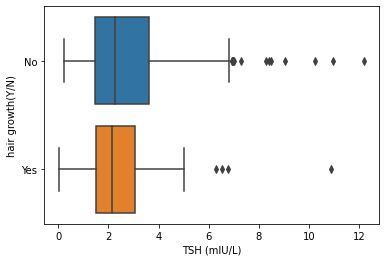

In [90]:
sns.boxplot(x='TSH (mIU/L)', y='hair growth(Y/N)', data=df)

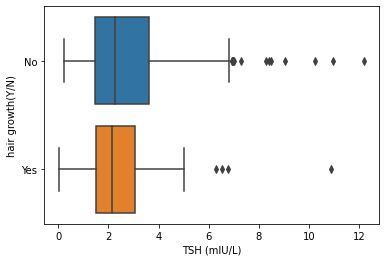

In [91]:
sns.boxplot(x='TSH (mIU/L)', y='hair growth(Y/N)', data=df)

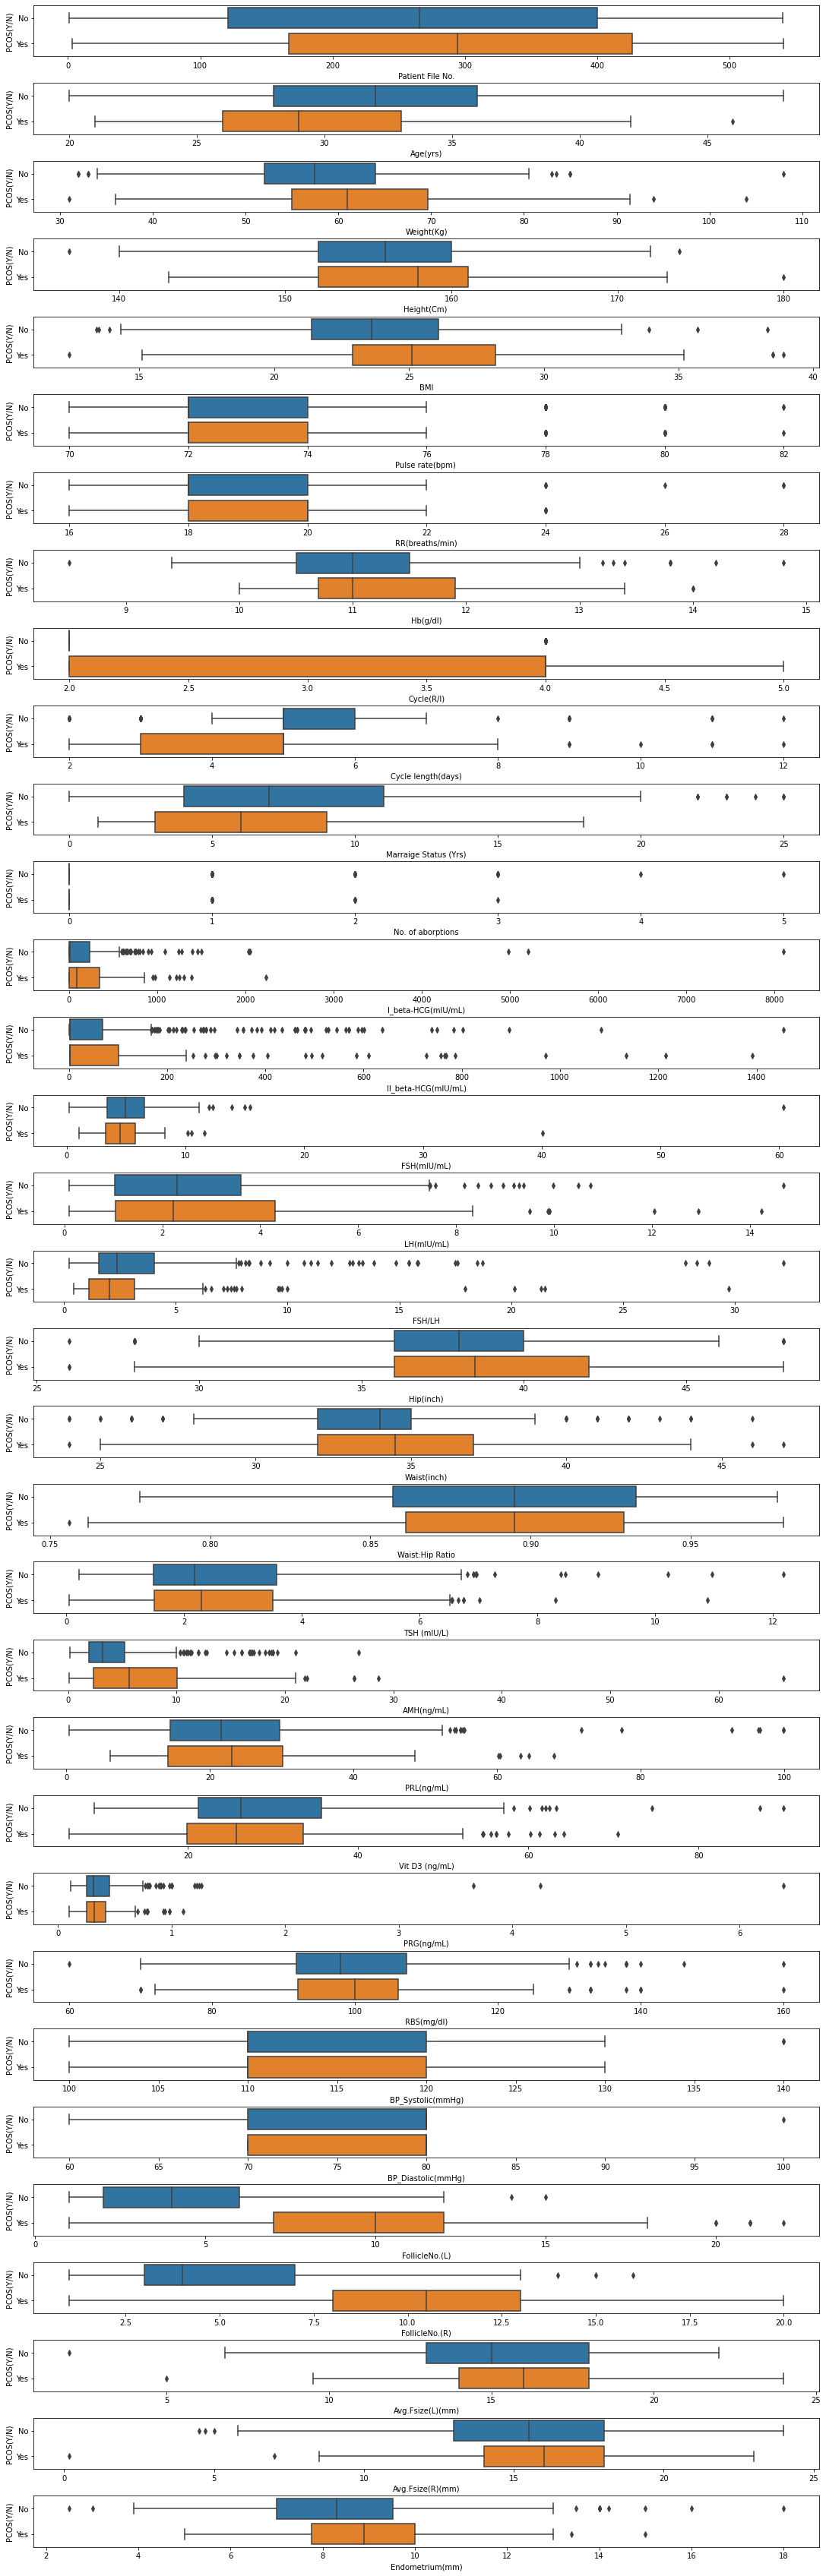

In [92]:
fig,ax=plt.subplots(numerical_col.size ,figsize=(15,47))
i=0

for col in numerical_col:
    sns.boxplot(x=df[col],y=df[ 'PCOS(Y/N)'] ,ax=ax[i])
    
    plt.xlabel(col)
    i=i+1
fig.tight_layout(pad=0.3)


In [93]:
numerical_col=numerical_col[1:]
numerical_col

Index(['Age(yrs)', 'Weight(Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
       'RR(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'No. of aborptions', 'I_beta-HCG(mIU/mL)',
       'II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
       'FollicleNo.(L)', 'FollicleNo.(R)', 'Avg.Fsize(L)(mm)',
       'Avg.Fsize(R)(mm)', 'Endometrium(mm)'],
      dtype='object')

In [94]:
categorical_col=[i for i in df.columns if df[i].dtype=='object']
categorical_col

['PCOS(Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

(-2.0, 2000.0)

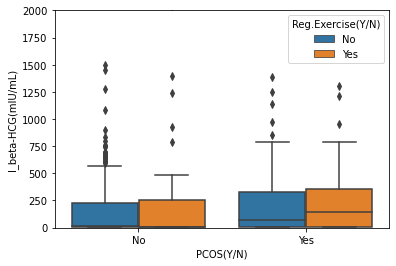

In [95]:
sns.boxplot(hue='Reg.Exercise(Y/N)', y='I_beta-HCG(mIU/mL)', x='PCOS(Y/N)', data=df, )
plt.ylim(-2,2000)
#meaningless

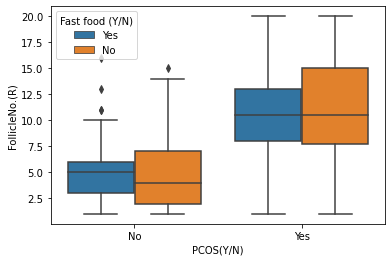

In [96]:
sns.boxplot(hue='Fast food (Y/N)', y='FollicleNo.(R)', x='PCOS(Y/N)', data=df ) #meaningless

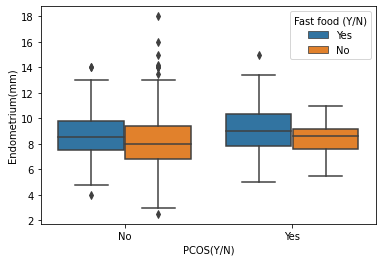

In [97]:
sns.boxplot(hue='Fast food (Y/N)', y='Endometrium(mm)', x='PCOS(Y/N)', data=df )

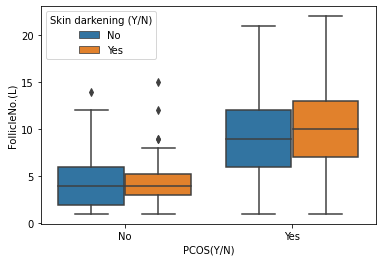

In [98]:
sns.boxplot(hue='Skin darkening (Y/N)', y='FollicleNo.(L)', x='PCOS(Y/N)', data=df )

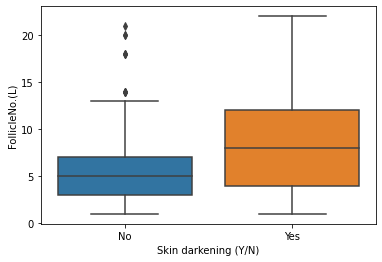

In [99]:
sns.boxplot(x='Skin darkening (Y/N)', y='FollicleNo.(L)', data=df )

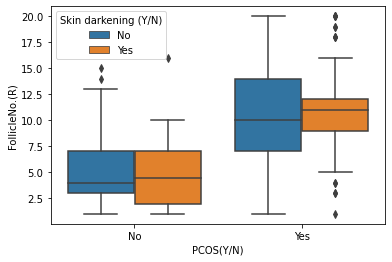

In [100]:
sns.boxplot(hue='Skin darkening (Y/N)', y='FollicleNo.(R)', x='PCOS(Y/N)', data=df ) #meaningless

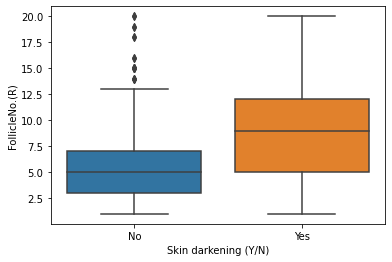

In [101]:
sns.boxplot(x='Skin darkening (Y/N)', y='FollicleNo.(R)', data=df )

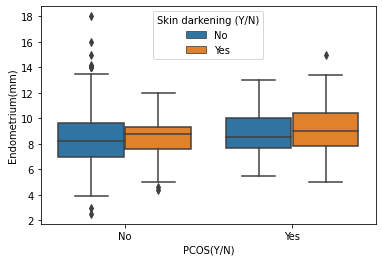

In [102]:
sns.boxplot(hue='Skin darkening (Y/N)', y='Endometrium(mm)', x='PCOS(Y/N)', data=df ) #meaningless

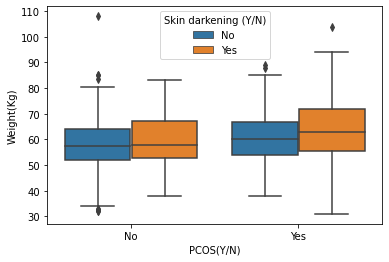

In [103]:
sns.boxplot(hue='Skin darkening (Y/N)', y='Weight(Kg)', x='PCOS(Y/N)', data=df ) #meaningless

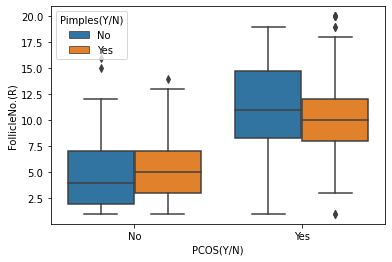

In [104]:
sns.boxplot(hue='Pimples(Y/N)', y='FollicleNo.(R)', x='PCOS(Y/N)', data=df, )


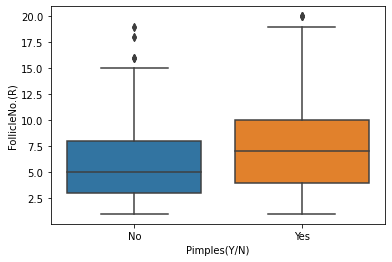

In [105]:
sns.boxplot(x='Pimples(Y/N)', y='FollicleNo.(R)', data=df, )
#no use


(0.0, 2000.0)

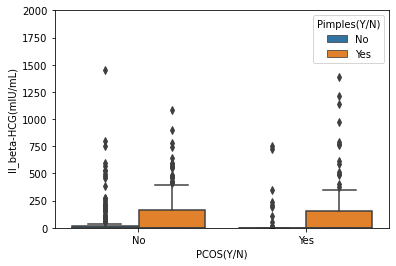

In [106]:
sns.boxplot(hue='Pimples(Y/N)', y='II_beta-HCG(mIU/mL)', x='PCOS(Y/N)', data=df, )
plt.ylim(0,2000)
#meaningless

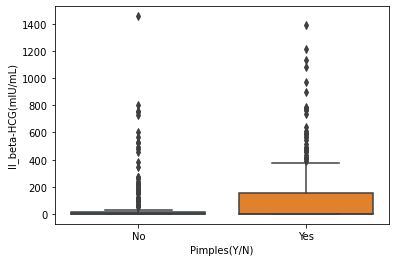

In [107]:
sns.boxplot(x='Pimples(Y/N)', y='II_beta-HCG(mIU/mL)', data=df, )
#no use

(0.0, 10.0)

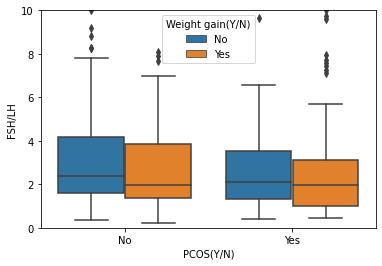

In [108]:
sns.boxplot(hue='Weight gain(Y/N)', y='FSH/LH', x='PCOS(Y/N)', data=df)
plt.ylim(0,10)

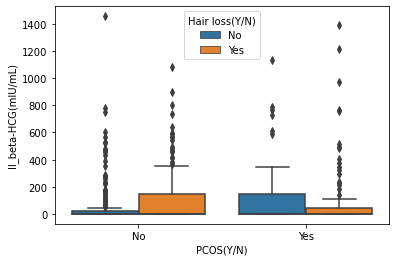

In [109]:
sns.boxplot(hue='Hair loss(Y/N)', y='II_beta-HCG(mIU/mL)',x='PCOS(Y/N)', data=df, )

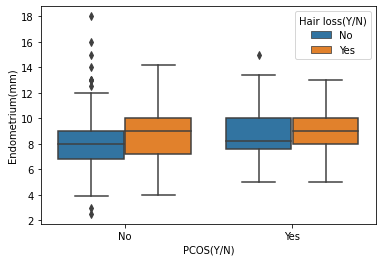

In [110]:
sns.boxplot(hue='Hair loss(Y/N)', y='Endometrium(mm)',x='PCOS(Y/N)', data=df, )  #meaningless

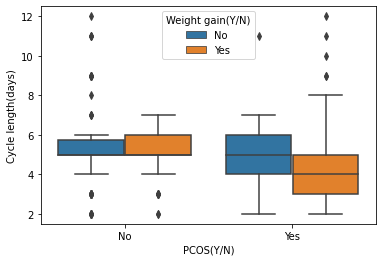

In [111]:
sns.boxplot(hue='Weight gain(Y/N)', y='Cycle length(days)',x='PCOS(Y/N)', data=df, )

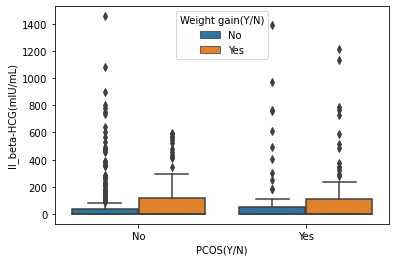

In [112]:
sns.boxplot(hue='Weight gain(Y/N)', y='II_beta-HCG(mIU/mL)',x='PCOS(Y/N)', data=df, ) #meaningless

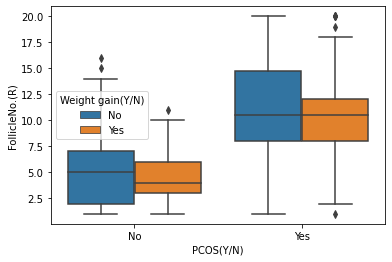

In [113]:
sns.boxplot(hue='Weight gain(Y/N)', y='FollicleNo.(R)',x='PCOS(Y/N)', data=df, ) #meaningless

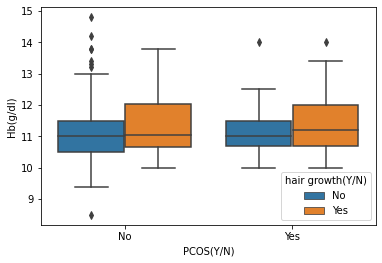

In [114]:
sns.boxplot(hue='hair growth(Y/N)', y='Hb(g/dl)',x='PCOS(Y/N)', data=df, ) #meaningless

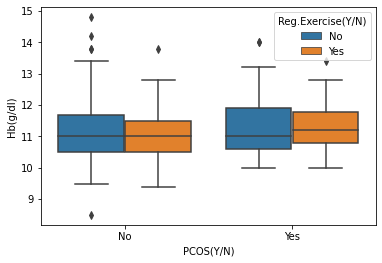

In [115]:
sns.boxplot(hue='Reg.Exercise(Y/N)', y='Hb(g/dl)',x='PCOS(Y/N)', data=df, ) #meaningless

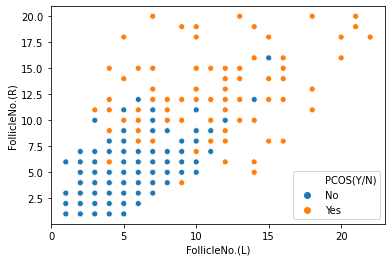

In [116]:
sns.scatterplot(hue='PCOS(Y/N)', y='FollicleNo.(R)', x='FollicleNo.(L)', data=df)  #follicle L v/s follicle R = 0.78

In [117]:
df.columns

Index(['Patient File No.', 'PCOS(Y/N)', 'Age(yrs)', 'Weight(Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP_Systolic(mmHg)',
       'BP_Diastolic(mmHg)', 'FollicleNo.(L)', 'FollicleNo.(R)',
       'Avg.Fsize(L)(mm)', 'Avg.Fsize(R)(mm)', 'Endometrium(mm)'],
      dtype='object')

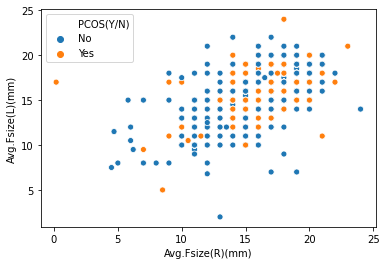

In [118]:
sns.scatterplot(hue='PCOS(Y/N)', y='Avg.Fsize(L)(mm)', x='Avg.Fsize(R)(mm)', data=df)  
#avg F size L v/s avg F size R = 0.58
#meaningless

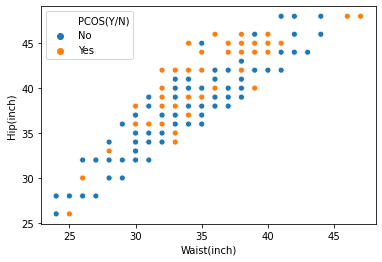

In [119]:
#hip  v/s waist = 0.87
sns.scatterplot(hue='PCOS(Y/N)', y='Hip(inch)', x='Waist(inch)', data=df) #meaningless

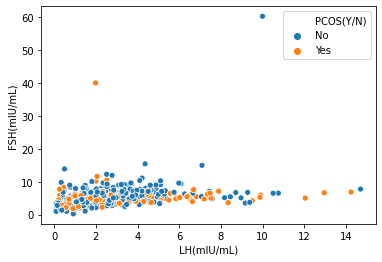

In [120]:
# fsh v/s lh = 0.32
sns.scatterplot(hue='PCOS(Y/N)', x='LH(mIU/mL)', y='FSH(mIU/mL)', data=df)
#meaningless

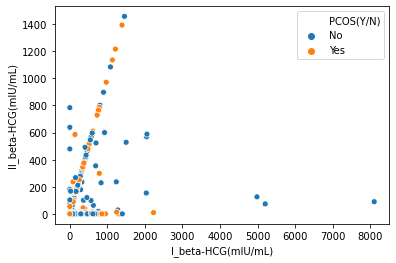

In [121]:
#beta I v/s beta II = 0.32
sns.scatterplot(hue='PCOS(Y/N)',x='I_beta-HCG(mIU/mL)', y='II_beta-HCG(mIU/mL)', data=df)
#meaningless

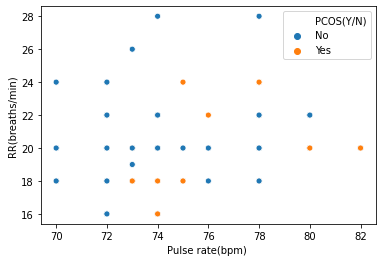

In [122]:
#pulse rate v/s  RR = 0.49
sns.scatterplot(hue='PCOS(Y/N)',x='Pulse rate(bpm) ',
       y='RR(breaths/min)', data=df)
#meaningless